# Titanic: Machine Learning from Disaster (All Died)

In [21]:
# Imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
import sklearn
import pandas as pd
import datetime as dt

# Main project directories
PROJECT_ROOT_DIR = Path.cwd()
DATASETS_DIR = PROJECT_ROOT_DIR / "datasets"
DATASETS_TITANIC_DIR = DATASETS_DIR / "titanic"
SUBMISSIONS_DIR = PROJECT_ROOT_DIR / "submissions"
IMAGES_DIR = PROJECT_ROOT_DIR / "images"

# Pretty plots
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Helper functions
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_DIR / (fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Load Data

In [22]:
TRAIN_DATA_PATH = DATASETS_TITANIC_DIR / "train.csv"
TEST_DATA_PATH = DATASETS_TITANIC_DIR / "test.csv"
titanic_train = pd.read_csv(TRAIN_DATA_PATH)  # load titanic train data
titanic_test = pd.read_csv(TEST_DATA_PATH)  # load titanic test data

In [23]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
titanic_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Saving figure attribute histogram plots


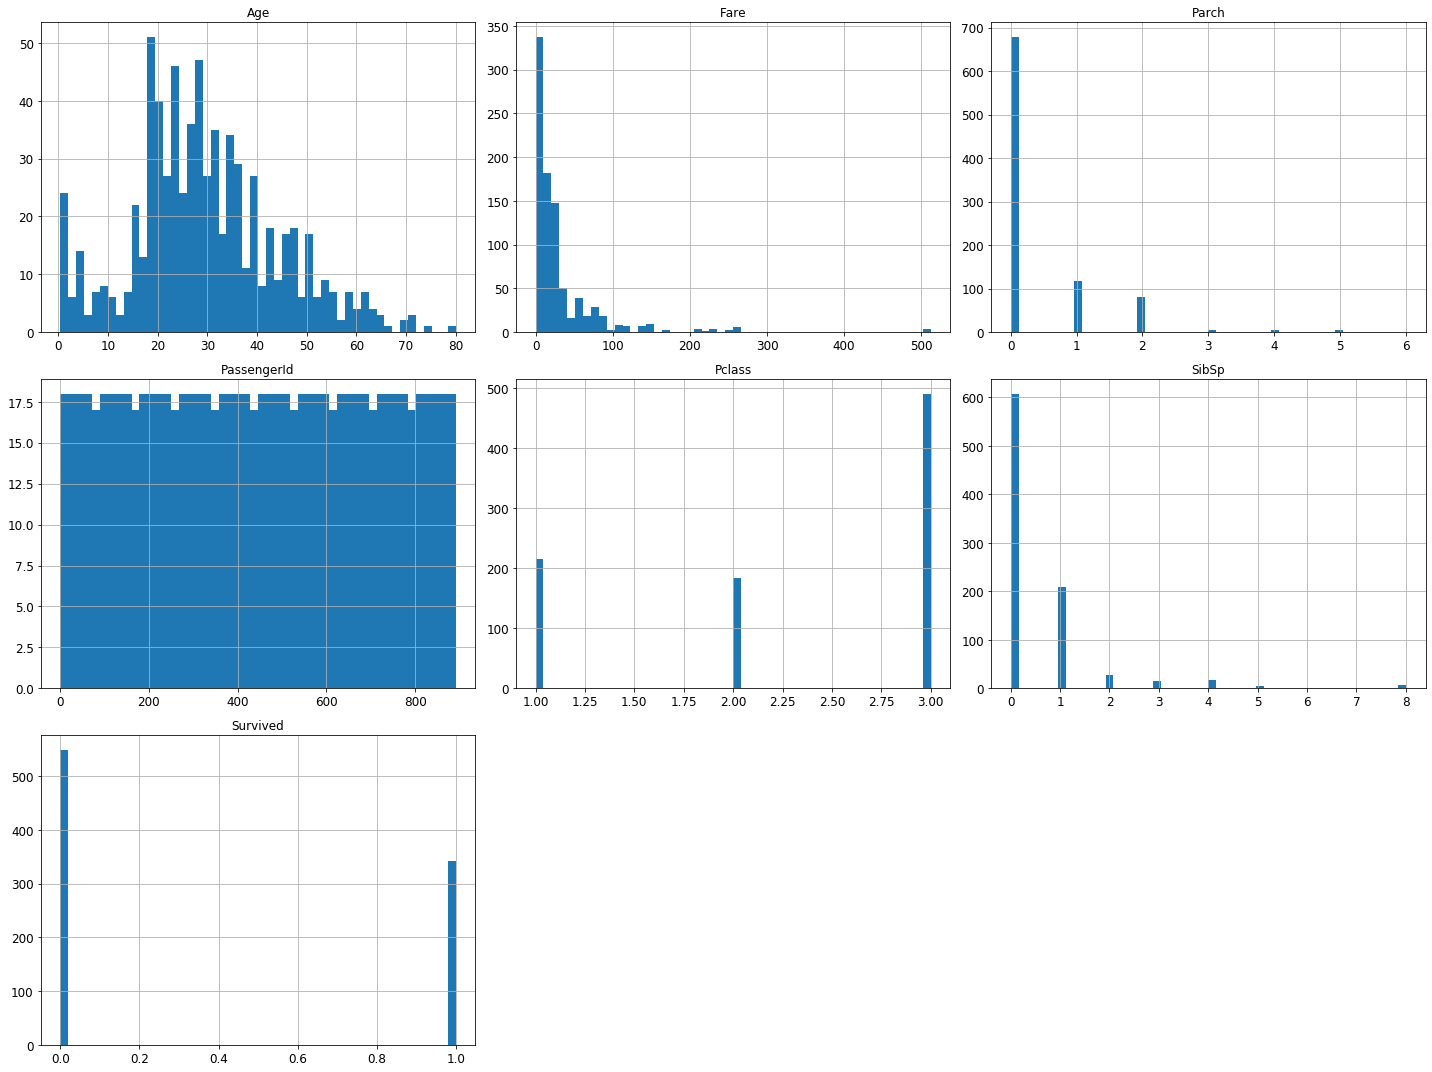

In [27]:
%matplotlib inline
titanic_train.hist(bins=50, figsize=(20,15))
save_fig("attribute histogram plots")
plt.show()

# Make Predictions for Test Data

In [29]:
submission_filename = 'submission_all_died_' + dt.datetime.now().strftime('%Y%m%d_%H%M%S') + '.csv'
submission_path = SUBMISSIONS_DIR / submission_filename
submission_df = titanic_test[['PassengerId']].copy()
submission_df['Survived'] = np.zeros((titanic_test.shape[0],), dtype=np.int64)
submission_df.to_csv(submission_path, index=False)
print("Wrote predictions to submission file:", submission_path)

Wrote predictions to submission file: /Users/Ben/code/github/titanic_machine_learning_from_disaster/submissions/submission_all_died_20200525_123054.csv
